In [1]:

%matplotlib widget
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random


In [2]:
#Endconfiguration with 8 robots 
placement_list = ['A','B','C','D','E','F','G','H','x0']
E8 = nx.Graph()
nodes = ['n1','n2','n3','n4','n5','n6','n7','n8','n9']
E8.add_nodes_from(nodes)

# neighborhoods (random)
# jede Knoten hat mind. zwei Nachbarn
#edge_list = []
#list_len = len(edge_list)
#rand_neighb = random.randint(rob_num+1, sum(rob_num+1))
edge_list = [('n1','n4'), ('n1','n2'), ('n2','n5'), ('n2','n3'), ('n3','n6'), ('n4','n7'), ('n4','n5'), ('n5','n8'), ('n5','n6'), ('n6','n9'), ('n7','n8'),('n8','n9')]
#E5.add_edges_from(edge_list)

In [3]:
def edges(g, edge_list, nodes):
    a = random.choice(nodes)
    b = random.choice(nodes)
    #TO DO: check: E8 zusammenhängend
    if (a != b) and ((a,b) not in edge_list) and ((b,a) not in edge_list):
        edge_list.append((a, b))
        print(edge_list)
        g.add_edges_from(edge_list)
        print ("n1 = ", g.degree['n1'], ", n2 = ", g.degree['n2'], ", n3 = ", g.degree['n3'], ", n4 = ", g.degree['n4'], ", n5 = ", g.degree['n5'], ", n6 = ", g.degree['n6'], ", n7 = ", g.degree['n7'], ", n8 = ", g.degree['n8'], ", n9 = ", g.degree['n9'])
        for i in nodes:
            while (g.degree[i] < 2):
                edges(g, edge_list, nodes)
    return edge_list


In [4]:
#edge_list = edges(E8,edge_list,nodes)
E8.add_edges_from(edge_list)

<function matplotlib.pyplot.show(close=None, block=None)>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
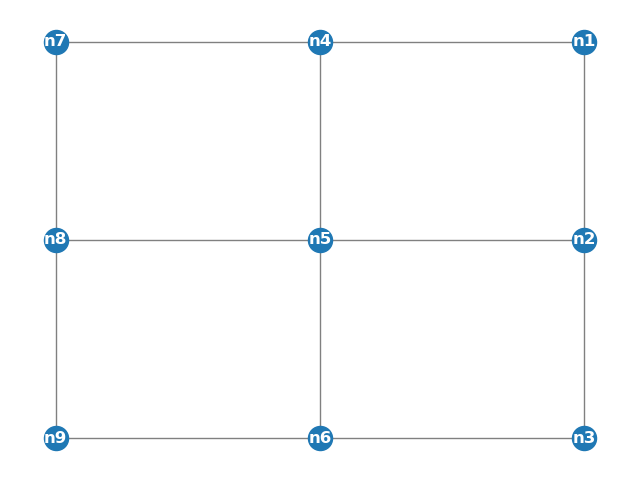

In [5]:
plt.figure()
pos = {'n1': (2.3,-0.8), 'n2': (2.3,-1.2), 'n3': (2.3,-1.6), 'n4': (1.9,-0.8), 'n5': (1.9,-1.2), 'n6': (1.9,-1.6), 'n7': (1.5,-0.8), 'n8': (1.5,-1.2), 'n9': (1.5,-1.6)}
nx.draw(E8, pos=pos, with_labels = True, edge_color='gray', font_weight='bold', font_color='white')
plt.show

In [6]:
#Zuordnung: Index stimmt mit Knotennr überein
def place_robots(placement_list, graph):
    p = placement_list
    rob_list = []
    for i in range(0,9):
        a = random.choice(p)
        rob_list.append(a)
        p.remove(a)

    return rob_list

In [7]:
#s=place_robots(placement_list,E8)
s=placement_list
print(s)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'x0']


In [8]:
def find_element(element,set_a):
    k = -1
    for i in set_a:
        k = k+1
        if i == element:
            n = nodes[k]
            return n

In [9]:
def find_element_tuple(element,set_a):
    element_pair = [item for item in set_a
          if item[0] == element or item[1] == element]
    
    return element_pair

In [10]:
n = find_element('x0', s)

In [11]:
def find_node_element(element,set_a):
    for i in set_a:
        if i[0] == element:
            node = i[1]
        if i[1] == element:
            node = i[0] 
    
    return node


In [12]:
#Neighbors of x0
def find_neighbors(set_a, edge_list):
    neighbor_list = []
    p_list = []
    n = find_element('x0',set_a)
    p_list = find_element_tuple(n,edge_list)
    while (len(p_list) != 0):
        nb = find_node_element(n,p_list) 
        neighbor_list.append(nb)
        p_list.pop()
    
    return neighbor_list

In [13]:
nb_list = find_neighbors(s,edge_list)

In [24]:
def randomize_multi_steps(s,edge_list,nb_list):
    for x in range(1,50):
        print(x)
        print(s)
        print(nb_list)
        #welche Roboter stehen auf den benachbarten Knoten zu x0?
        rob_list = []
        dummy_list = ['n1', 'n2', 'n3', 'n4','n5', 'n6', 'n7', 'n8', 'n9']

        for i in nb_list:
            x = 0
            for j in dummy_list:
                if i==j:
                    rob = s[x] 
                    rob_list.append(rob)
                x = x+1
        c = random.choice(rob_list)

        #x0 und c tauschen Plätze 
        k = -1
        for i in s:
            k = k+1
            if i == 'x0':
                s[k] = c
            if i == c:
                s[k] = 'x0'
        nb_list = find_neighbors(s,edge_list)
                

    return s


In [25]:
print(s)
result = randomize_multi_steps(s,edge_list,nb_list)
print(result)

['A', 'C', 'x0', 'F', 'B', 'H', 'D', 'G', 'E']
1
['A', 'C', 'x0', 'F', 'B', 'H', 'D', 'G', 'E']
['n8', 'n6']
2
['A', 'C', 'G', 'F', 'B', 'H', 'D', 'x0', 'E']
['n9', 'n7', 'n5']
3
['A', 'C', 'G', 'F', 'B', 'H', 'D', 'E', 'x0']
['n8', 'n6']
4
['A', 'C', 'G', 'F', 'B', 'x0', 'D', 'E', 'H']
['n9', 'n5', 'n3']
5
['A', 'C', 'G', 'F', 'x0', 'B', 'D', 'E', 'H']
['n6', 'n8', 'n4', 'n2']
6
['A', 'C', 'G', 'x0', 'F', 'B', 'D', 'E', 'H']
['n5', 'n7', 'n1']
7
['A', 'C', 'G', 'D', 'F', 'B', 'x0', 'E', 'H']
['n8', 'n4']
8
['A', 'C', 'G', 'x0', 'F', 'B', 'D', 'E', 'H']
['n5', 'n7', 'n1']
9
['A', 'C', 'G', 'D', 'F', 'B', 'x0', 'E', 'H']
['n8', 'n4']
10
['A', 'C', 'G', 'D', 'F', 'B', 'E', 'x0', 'H']
['n9', 'n7', 'n5']
11
['A', 'C', 'G', 'D', 'F', 'B', 'x0', 'E', 'H']
['n8', 'n4']
12
['A', 'C', 'G', 'x0', 'F', 'B', 'D', 'E', 'H']
['n5', 'n7', 'n1']
13
['A', 'C', 'G', 'F', 'x0', 'B', 'D', 'E', 'H']
['n6', 'n8', 'n4', 'n2']
14
['A', 'x0', 'G', 'F', 'C', 'B', 'D', 'E', 'H']
['n3', 'n5', 'n1']
15
['A', 'G', 